## Import packages

In [2]:
import os
import sys
sys.path.append(os.path.join(".."))

# Import teaching utils
import numpy as np
import utils.classifier_utils as clf_util

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Fetch data

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [7]:
sorted(set(y))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Depending on the versions of ```pandas``` and ```sklearn``` that you're using, you may need to expressly convert these to ```numpy``` arrays.

In [ ]:
X = np.array(X)
y = np.array(y)

__Predifine classes and number of classes__

In [8]:
classes = sorted(set(y))
nclasses = len(classes)

__Plot random sample__

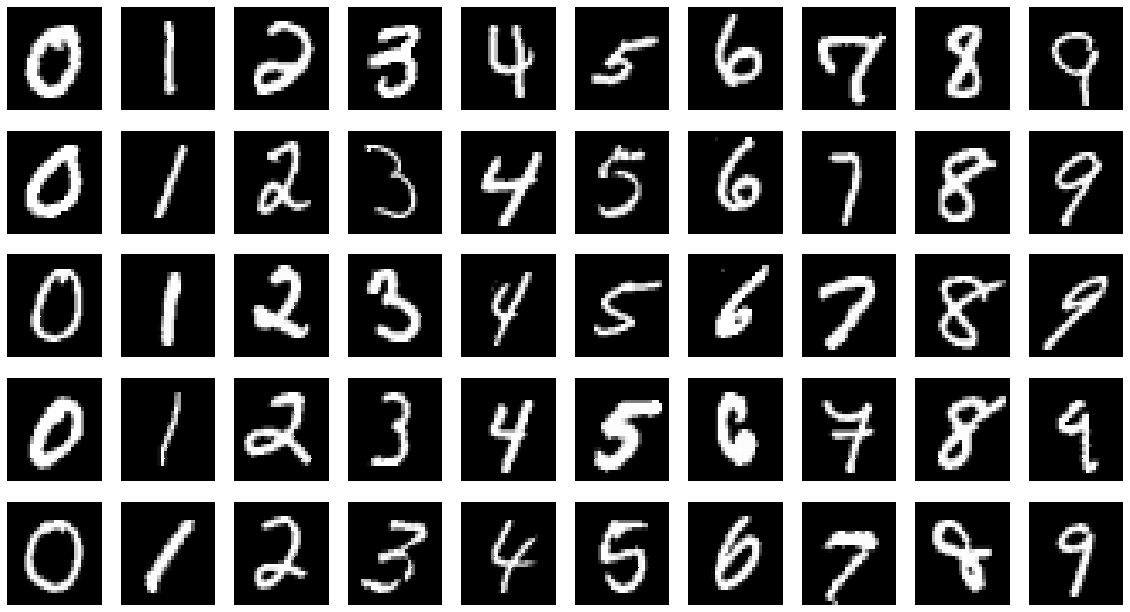

In [9]:
clf_util.plot_sample(X, y, classes, 5)

## Create training and test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=9,
                                                    train_size=7500, 
                                                    test_size=2500)

We should also scale the features

In [6]:
#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

## Train a logistic regression model

In [7]:
clf = LogisticRegression(penalty='none', 
                         tol=0.1, 
                         solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

In [8]:
#to check the shape of the coefficient matrix
clf.coef_.shape

(10, 784)

## Interpreting the coefficients

We can plot the coefficients for our model, showing which 'features' are most informative when it comes to predicting each class

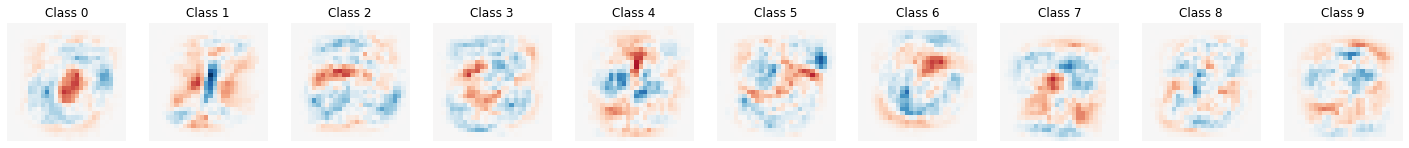

In [9]:
clf_util.plot_coefs(clf.coef_, nclasses)

## Individual predictions

We can then use this model to predict the class of an individual data point.

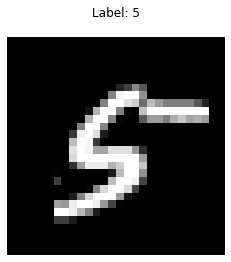

In [10]:
clf_util.plot_individual(X_test_scaled, y_test, 50)

We can compute the conditional probability for each class and then plot the probability distribution.

## Show the distribution of probabilities

I think that this is class 5


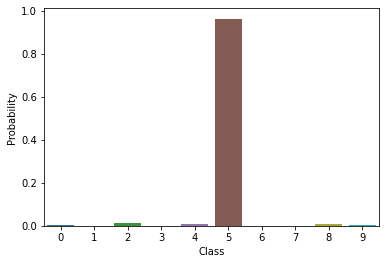

In [26]:
clf_util.plot_probs(X_test_scaled, 50, clf, classes)

We can find the class with the highest probability. 

If this matches the actual label for the first test sample, then our prediction is correct.

## Accuracy

We can calculate predictions for all data the scaled test data.

In [12]:
y_pred = clf.predict(X_test_scaled)

We then calculate metrics for accuracy based on comparing the predicted labels with the actual labels.

In [27]:
#method 2
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9052


In [28]:
cm = metrics.classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       244
           1       0.91      0.97      0.94       287
           2       0.89      0.90      0.89       235
           3       0.89      0.88      0.89       281
           4       0.90      0.94      0.92       213
           5       0.88      0.85      0.87       215
           6       0.95      0.92      0.94       225
           7       0.92      0.91      0.92       257
           8       0.84      0.83      0.84       253
           9       0.90      0.87      0.89       290

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.90      2500



This can be visualised using a confusion matrix

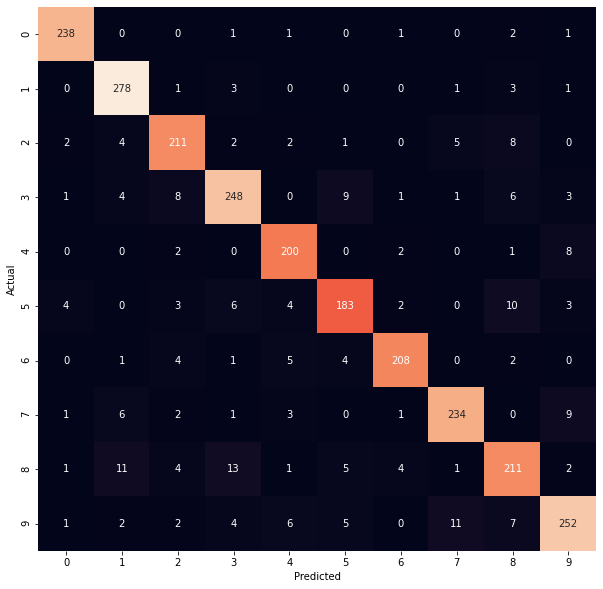

In [29]:
clf_util.plot_cm(y_test, y_pred, normalized=False)

We can also normalize the confusion matrix to show percentages instead of raw values

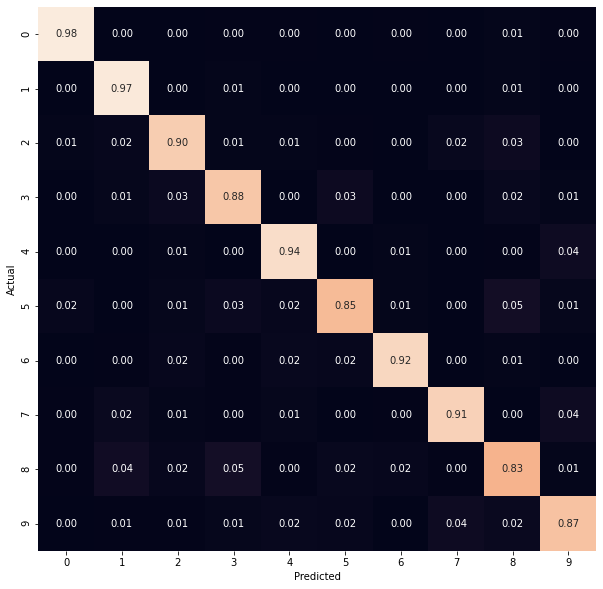

In [30]:
clf_util.plot_cm(y_test, y_pred, normalized=True)

## Test on new data

In [40]:
import cv2
import matplotlib.pyplot as plt

In [41]:
test_image = cv2.imread("/Users/au564346/Desktop/OnPaste.20210310-133750.png")

Use bitwise not to invert regular grayscale

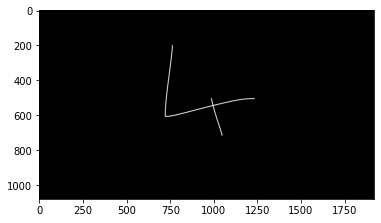

In [42]:
gray = cv2.bitwise_not(cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY))
plt.imshow(gray, cmap=plt.cm.gray)

Resize down to 28x28 image

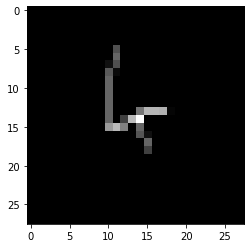

In [43]:
compressed = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(compressed, cmap=plt.cm.gray)

I think that this is class 4


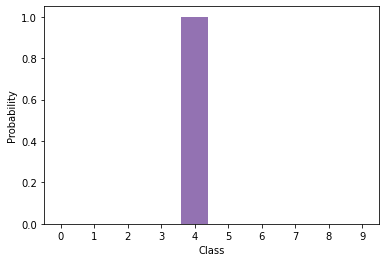

In [44]:
clf_util.predict_unseen(compressed, clf, classes)

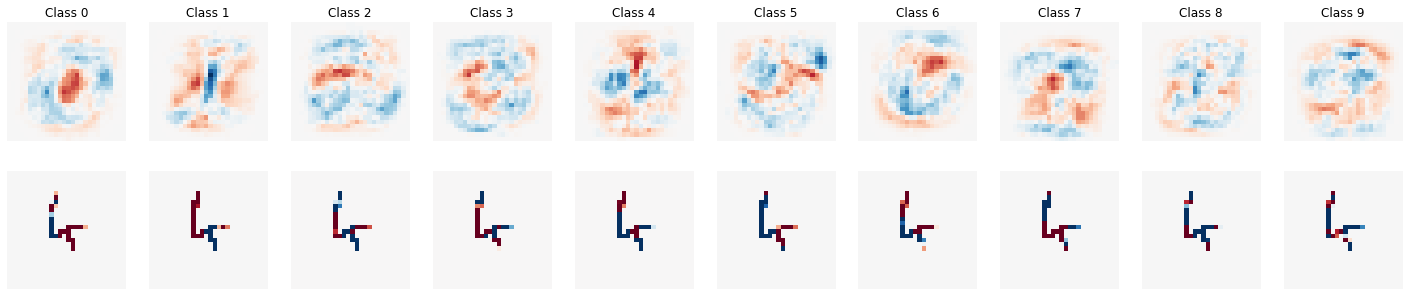

In [45]:
clf_util.prediction_coefficients(compressed, clf, classes)